# Facial Alignment Exercise

Make sure you're using the python from your virtual environment.

In [1]:
import sys
sys.executable

'/Users/loki/Documents/Github/facial-alignment-exercise/venv/bin/python'

Import libraries that we'll need.

In [2]:
%matplotlib notebook

import cv2 as cv
import dlib
import matplotlib.pyplot as plt
import numpy as np

Create detector and predictor.

In [3]:
MODEL_PATH = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(MODEL_PATH)

Read images that we'll use for this exercise.

In [4]:
img_1 = cv.imread("imgs/img1.jpg")
img_2 = cv.imread("imgs/img2.jpg")
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

Create two functions that we'll use for getting facial landmarks and annotate images.

In [5]:
def get_landmarks(img):
    """ Detect frontal face and return a list of facial landmarks """
    faces = detector(img, 1)
    return np.matrix([[p.x, p.y] for p in predictor(img, faces[0]).parts()])

def annotate(img, landmarks):
    """ Take a list of landmarks and return an annotated image """
    res = img.copy()
    for i, mark in enumerate(landmarks):
        pos = (mark[0, 0], mark[0, 1])
        cv.putText(res, str(i), pos,
                   fontFace=cv.FONT_HERSHEY_SCRIPT_SIMPLEX,
                   fontScale=0.4,
                   color=(0, 0, 255))
        cv.circle(res, pos, 3, color=(0, 255, 255))
    return res

In [6]:
landmarks = get_landmarks(img_1)
res = annotate(img_1, landmarks)

<IPython.core.display.Javascript object>


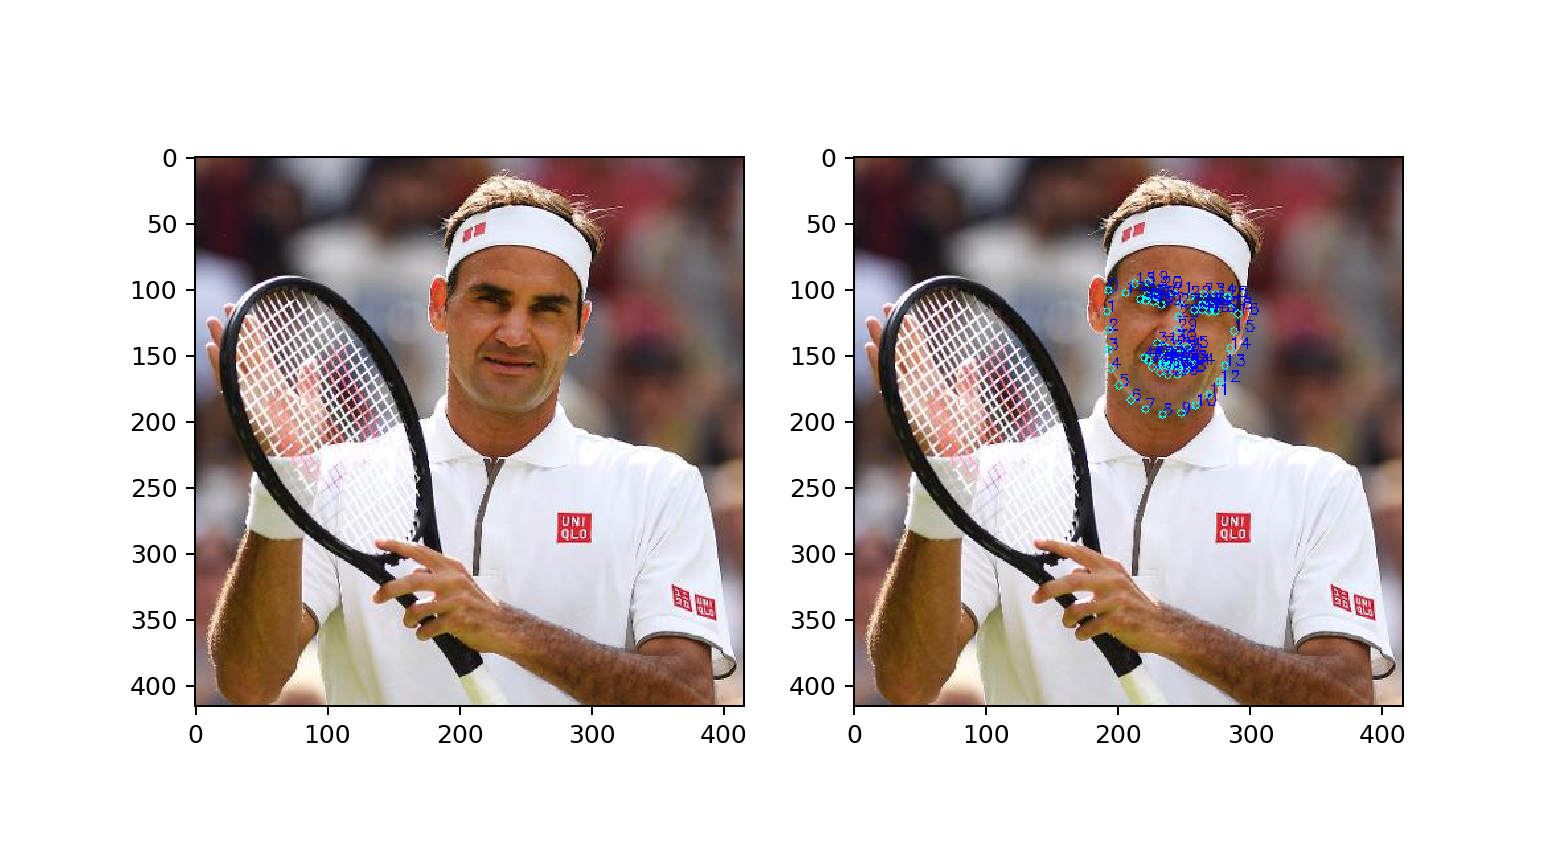

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_1)
ax2.imshow(res)
fig.show()